In [7]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import pandas as pd
import os

In [9]:
df_spy_30min = pd.read_csv(f'SPY_30min_sample.txt', sep=',', header=None)
df_spy_30min.columns = ['Date Time', 'open', 'high', 'low', 'close', 'volume']

last_high_list = []

close_prices = df_spy_30min[['Date Time','close']]
len_of_close_prices = len(close_prices)
turn_point_prices = []
if len_of_close_prices > 1:
    revserse_direction_is_up = (close_prices.loc[len_of_close_prices-2,'close'] > close_prices.loc[len_of_close_prices-1, 'close'])

last_turn_price = (close_prices.loc[len_of_close_prices-1, 'Date Time'], close_prices.loc[len_of_close_prices-1, 'close'])
for i in range(len_of_close_prices - 2, -1, -1):
    if close_prices.loc[i, 'close'] == last_turn_price[1]:
        last_turn_price = (close_prices.loc[i, 'Date Time'], close_prices.loc[i, 'close'])
        continue

    if close_prices.loc[i, 'close'] > last_turn_price[1]:
        if revserse_direction_is_up == False:
            turn_point_prices.insert(0,(close_prices.loc[i, 'Date Time'], close_prices.loc[i, 'close']))
            revserse_direction_is_up = True
    else:
        if revserse_direction_is_up == True:
            turn_point_prices.insert(0,(close_prices.loc[i, 'Date Time'], close_prices.loc[i, 'close']))
            revserse_direction_is_up = False
    
    last_turn_price = (close_prices.loc[i, 'Date Time'], close_prices.loc[i, 'close'])


print(turn_point_prices)

[('2022-04-01 04:00:00', 453.9), ('2022-04-01 04:30:00', 454.01), ('2022-04-01 05:30:00', 454.35), ('2022-04-01 06:30:00', 454.31), ('2022-04-01 07:30:00', 454.12), ('2022-04-01 08:00:00', 454.23), ('2022-04-01 08:30:00', 453.24), ('2022-04-01 09:30:00', 452.26), ('2022-04-01 10:00:00', 451.1), ('2022-04-01 11:00:00', 451.695), ('2022-04-01 11:30:00', 450.35), ('2022-04-01 12:30:00', 449.931), ('2022-04-01 13:30:00', 450.53), ('2022-04-01 14:30:00', 451.7966), ('2022-04-01 15:00:00', 451.0799), ('2022-04-01 15:30:00', 452.88), ('2022-04-01 17:00:00', 452.93), ('2022-04-01 18:00:00', 453.11), ('2022-04-01 19:00:00', 453.05), ('2022-04-01 19:30:00', 453.29), ('2022-04-04 05:00:00', 453.51), ('2022-04-04 06:00:00', 453.71), ('2022-04-04 07:00:00', 453.62), ('2022-04-04 08:00:00', 453.68), ('2022-04-04 09:30:00', 454.52), ('2022-04-04 10:00:00', 454.84), ('2022-04-04 11:30:00', 455.51), ('2022-04-04 12:00:00', 455.5654), ('2022-04-04 15:00:00', 456.1), ('2022-04-04 16:00:00', 456.73), ('20

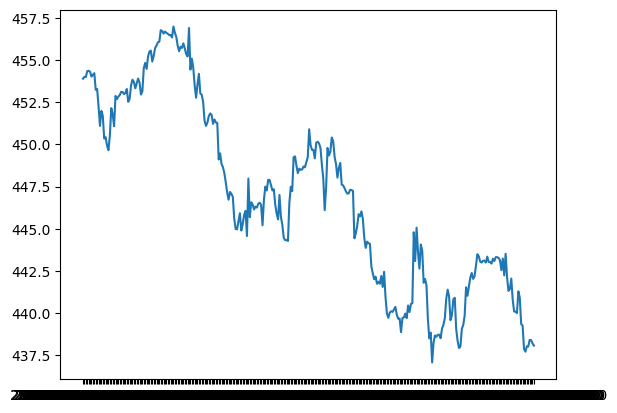

In [10]:
plt.plot(close_prices['Date Time'], close_prices['close'])

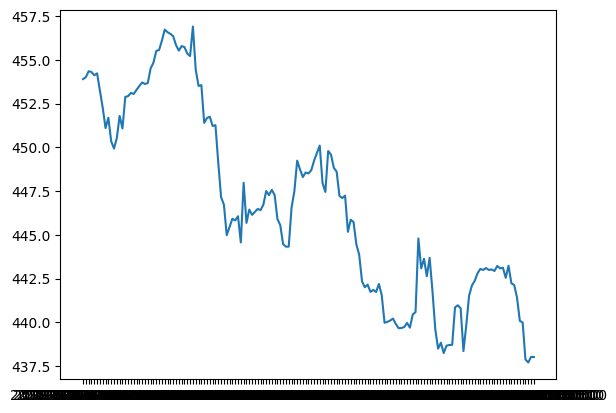

('2022-04-01 05:00:00', 454.0)
('2022-04-01 08:30:00', 453.24)
('2022-04-01 10:00:00', 451.1)
('2022-04-01 11:30:00', 450.35)
('2022-04-01 13:00:00', 449.66)
('2022-04-01 16:00:00', 452.69)
('2022-04-01 18:00:00', 453.11)
('2022-04-01 18:30:00', 452.99)
('2022-04-04 04:00:00', 452.53)
('2022-04-04 06:00:00', 453.71)
('2022-04-04 06:30:00', 453.33)
('2022-04-04 08:00:00', 453.68)
('2022-04-04 08:30:00', 452.96)
('2022-04-04 10:30:00', 454.48)
('2022-04-04 16:00:00', 456.73)
('2022-04-04 16:30:00', 456.58)
('2022-04-04 18:00:00', 456.57)
('2022-04-04 18:30:00', 456.49)
('2022-04-04 19:30:00', 456.35)
('2022-04-05 05:30:00', 455.85)
('2022-04-05 06:00:00', 455.53)
('2022-04-05 08:00:00', 455.7)
('2022-04-05 08:30:00', 455.36)
('2022-04-05 09:00:00', 455.22)
('2022-04-05 10:00:00', 454.44)
('2022-04-05 11:30:00', 453.51)
('2022-04-05 12:00:00', 452.77)
('2022-04-05 13:30:00', 453.02)
('2022-04-05 14:00:00', 452.95)
('2022-04-05 14:30:00', 452.51)
('2022-04-05 15:00:00', 451.4002)
('2022-04

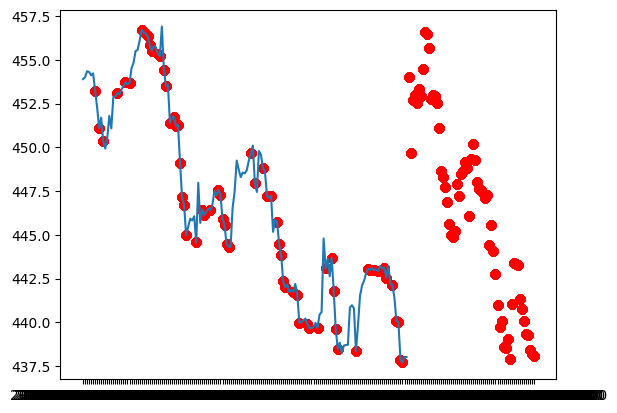

In [13]:
plt.plot([row[0] for row in turn_point_prices], [row[1] for row in turn_point_prices])

# Find the important points
important_points = []
highest_price = float('-inf')
lowest_price = float('inf')

for index, row in df_spy.iterrows():
    current_price = row['close']
    
    if current_price > highest_price:
        highest_price = current_price
    elif current_price < lowest_price:
        lowest_price = current_price
        important_points.append((row['Date Time'], current_price))
    
    if current_price < highest_price and current_price > lowest_price:
        highest_price = float('-inf')
        lowest_price = float('inf')

# Print the important points
for point in important_points:
    print(point)
    important_points_x = [point[0] for point in important_points]
    important_points_y = [point[1] for point in important_points]

    plt.scatter(important_points_x, important_points_y, color='red')


In [5]:
import pandas as pd

# Read the data from the file
df_spy = pd.read_csv('SPY_30min_sample.txt', sep=',', header=None)
df_spy.columns = ['Date Time', 'open', 'high', 'low', 'close', 'volume']

# Find the turn points
turn_points = []
highest_price = float('-inf')
lowest_price = float('inf')

for index, row in df_spy.iterrows():
    current_price = row['close']
    
    if current_price > highest_price:
        highest_price = current_price
    elif current_price < lowest_price:
        lowest_price = current_price
        turn_points.append((row['Date Time'], current_price))

# Print the turn points
for point in turn_points:
    print(point)


('2022-04-01 05:00:00', 454.0)
('2022-04-01 08:30:00', 453.24)
('2022-04-01 09:30:00', 452.26)
('2022-04-01 10:00:00', 451.1)
('2022-04-01 11:30:00', 450.35)
('2022-04-01 12:30:00', 449.931)
('2022-04-01 13:00:00', 449.66)
('2022-04-06 04:00:00', 449.11)
('2022-04-06 05:00:00', 448.84)
('2022-04-06 05:30:00', 448.65)
('2022-04-06 06:00:00', 448.3)
('2022-04-06 06:30:00', 447.75)
('2022-04-06 07:00:00', 447.15)
('2022-04-06 07:30:00', 446.72)
('2022-04-06 09:30:00', 445.59)
('2022-04-06 10:00:00', 444.98)
('2022-04-06 10:30:00', 444.965)
('2022-04-06 12:00:00', 444.89)
('2022-04-06 14:00:00', 444.565)
('2022-04-07 11:00:00', 444.47)
('2022-04-07 11:30:00', 444.32)
('2022-04-07 12:30:00', 444.2715)
('2022-04-11 08:00:00', 443.86)
('2022-04-11 10:00:00', 442.765)
('2022-04-11 10:30:00', 442.35)
('2022-04-11 11:00:00', 442.0)
('2022-04-11 12:00:00', 441.735)
('2022-04-11 13:00:00', 441.73)
('2022-04-11 14:00:00', 441.545)
('2022-04-11 15:00:00', 440.96)
('2022-04-11 15:30:00', 439.97)
('20